# Лабораториска Вежба 4 - Надгледувано Учење

# Forest Fires Data Set
<font color="red">
Name: <strong> Dimitrija Timeski</strong></font>
<br>

<font color="orange">
Index:  <strong>203235</strong>
</font>

Data from: https://archive.ics.uci.edu/dataset/162/forest+fires

Citation Request:
  This dataset is public available for research. The details are described in [Cortez and Morais, 2007].
  Please include this citation if you plan to use this database:

  P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data.
  In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence,
  Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December,
  Guimaraes, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9.
  Available at: http://www.dsi.uminho.pt/~pcortez/fires.pdf

1. Title: Forest Fires

2. Sources
   Created by: Paulo Cortez and Aníbal Morais (Univ. Minho) @ 2007
   
3. Past Usage:

   P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data.
   In Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence,
   December, 2007. (http://www.dsi.uminho.pt/~pcortez/fires.pdf)
   
   In the above reference, the output "area" was first transformed with a ln(x+1) function.
   Then, several Data Mining methods were applied. After fitting the models, the outputs were
   post-processed with the inverse of the ln(x+1) transform. Four different input setups were
   used. The experiments were conducted using a 10-fold (cross-validation) x 30 runs. Two
   regression metrics were measured: MAD and RMSE. A Gaussian support vector machine (SVM) fed
   with only 4 direct weather conditions (temp, RH, wind and rain) obtained the best MAD value:
   12.71 +- 0.01 (mean and confidence interval within 95% using a t-student distribution). The
   best RMSE was attained by the naive mean predictor. An analysis to the regression error curve
   (REC) shows that the SVM model predicts more examples within a lower admitted error. In effect,
   the SVM model predicts better small fires, which are the majority.

4. Relevant Information:

   This is a very difficult regression task. It can be used to test regression methods. Also, it could be used to test outlier detection methods, since it is not clear how many outliers
   are there. Yet, the number of examples of fires with a large burned area is very small.

5. Number of Instances: 517

6. Number of Attributes: 12 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez and Morais, 2007].

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec"
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3
   7. DC - DC index from the FWI system: 7.9 to 860.6
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40
   12. rain - outside rain in mm/m2 : 0.0 to 6.4
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform).

8. Missing Attribute Values: None


In [222]:
import pandas as pd
import numpy as np

In [223]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MU/Lab_4/forestfires.csv")

In [224]:
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


# Feature Selection

X и Y не играат некоја голема улога, целта е да се предвидува површина пожар каде било со помош на сите други податоци.

Денот не би играл значајна улога сам по себе.

In [225]:
data.drop(['X', 'Y', "day"], axis=1, inplace=True)
data

,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,mar,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,oct,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,oct,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,mar,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,mar,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
512,aug,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,aug,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,aug,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,aug,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


# Feature Extraction

За тренирање на нашите модели треба сите колони да имаат нумерички вредности:

In [226]:
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
data['month'] = data['month'].map(month_mapping)

# day_mapping = {
#     'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7
# }
# data['day'] = data['day'].map(day_mapping)

data

,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,3,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,10,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,10,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
512,8,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,8,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,8,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,8,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


area има голем број на мали вредности (right skewed).

Ќе и направам логаритамска трансформација ln(x+1)

In [227]:
data_copy = data.copy()

data['area'] = np.log1p(data_copy['area'])

array([[<Axes: title={'center': 'area'}>]], dtype=object)

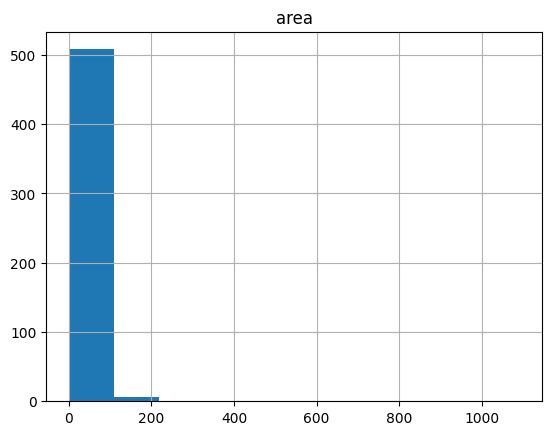

In [228]:
data_copy.hist("area")

# Visualization

Може да приметиме дека немаме null вредности во податочното множество.

In [229]:
data.isna().sum()

month    0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

Сите колони се бројчани вредности:

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   517 non-null    int64  
 1   FFMC    517 non-null    float64
 2   DMC     517 non-null    float64
 3   DC      517 non-null    float64
 4   ISI     517 non-null    float64
 5   temp    517 non-null    float64
 6   RH      517 non-null    int64  
 7   wind    517 non-null    float64
 8   rain    517 non-null    float64
 9   area    517 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 40.5 KB


## Heatmap

Може да забележеме дека и покрај логаритамската трансформација, area сепак нема некоја голема зависност со ниту една вредност. Освен со месецот (0.1~) што е сепак мала вредност.

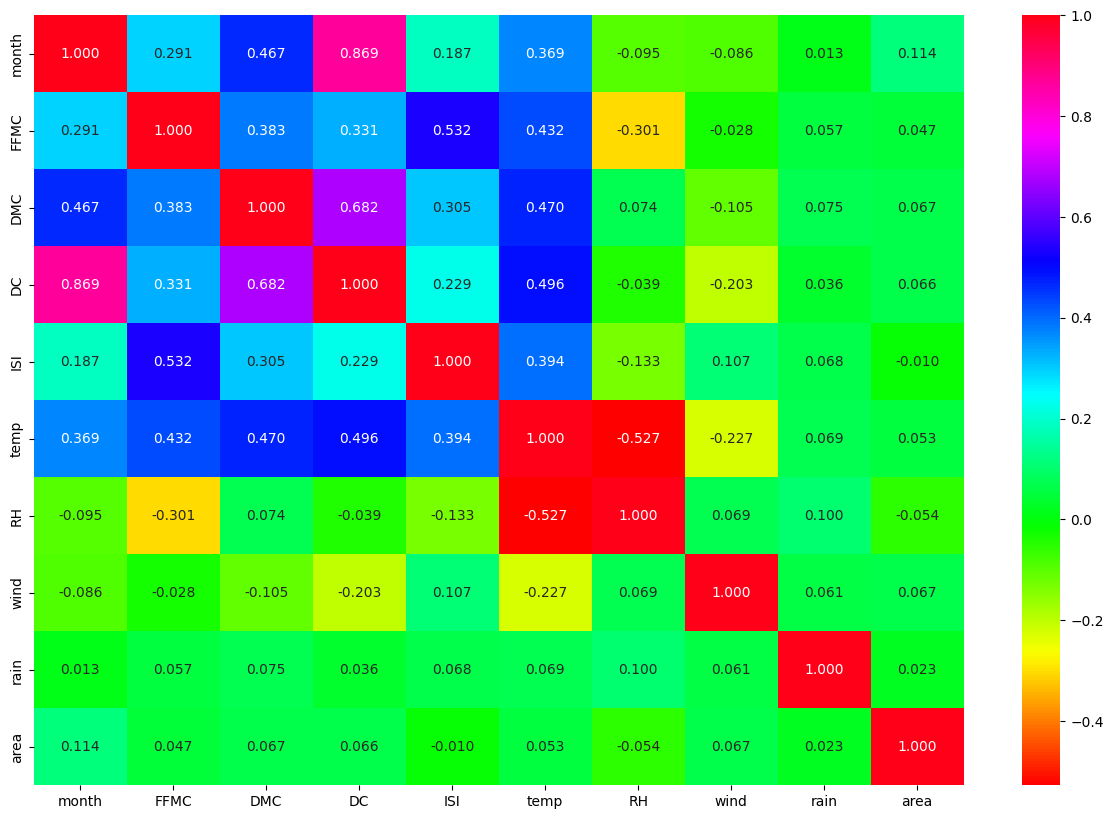

In [231]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), cmap="hsv", fmt='.3f', annot=True)
plt.show()

## Pairplot

Објаснување за променливите

- FFMC (Fine Fuel Moisture Code): It represents the moisture content of fine fuels, such as grass, leaves, and twigs. It indicates the ease of ignition and the flammability of the surface fuels.

- DMC (Duff Moisture Code): It represents the moisture content of decomposed organic material (duff layer) beneath the surface fuels. Duff is the layer of dead leaves, needles, and other organic matter on the forest floor. The DMC reflects the availability of fuel for a surface fire.

- DC (Drought Code): It represents the drying potential of deep, compact organic layers. It is a measure of the moisture content in the lower organic layers of the soil and influences the availability of deep fuels for combustion.

- ISI (Initial Spread Index): It represents the rate of fire spread at the beginning of the fire. It takes into account the wind speed, FFMC, and the availability of fuels. The ISI provides an estimate of the potential difficulty of controlling a fire.

Во овие scatterplot-ови:
-   Може да забележеме дека DC и DMC имаат линеарна зависност.
  - Беше забележена и во претходниот Heatmap (0.682)
-   Додека пак ISI и FFMC имаат експоненцијална зависност. (0.532)
-   FFMC со temp имаат видлива линеарна зависност. (0.432)

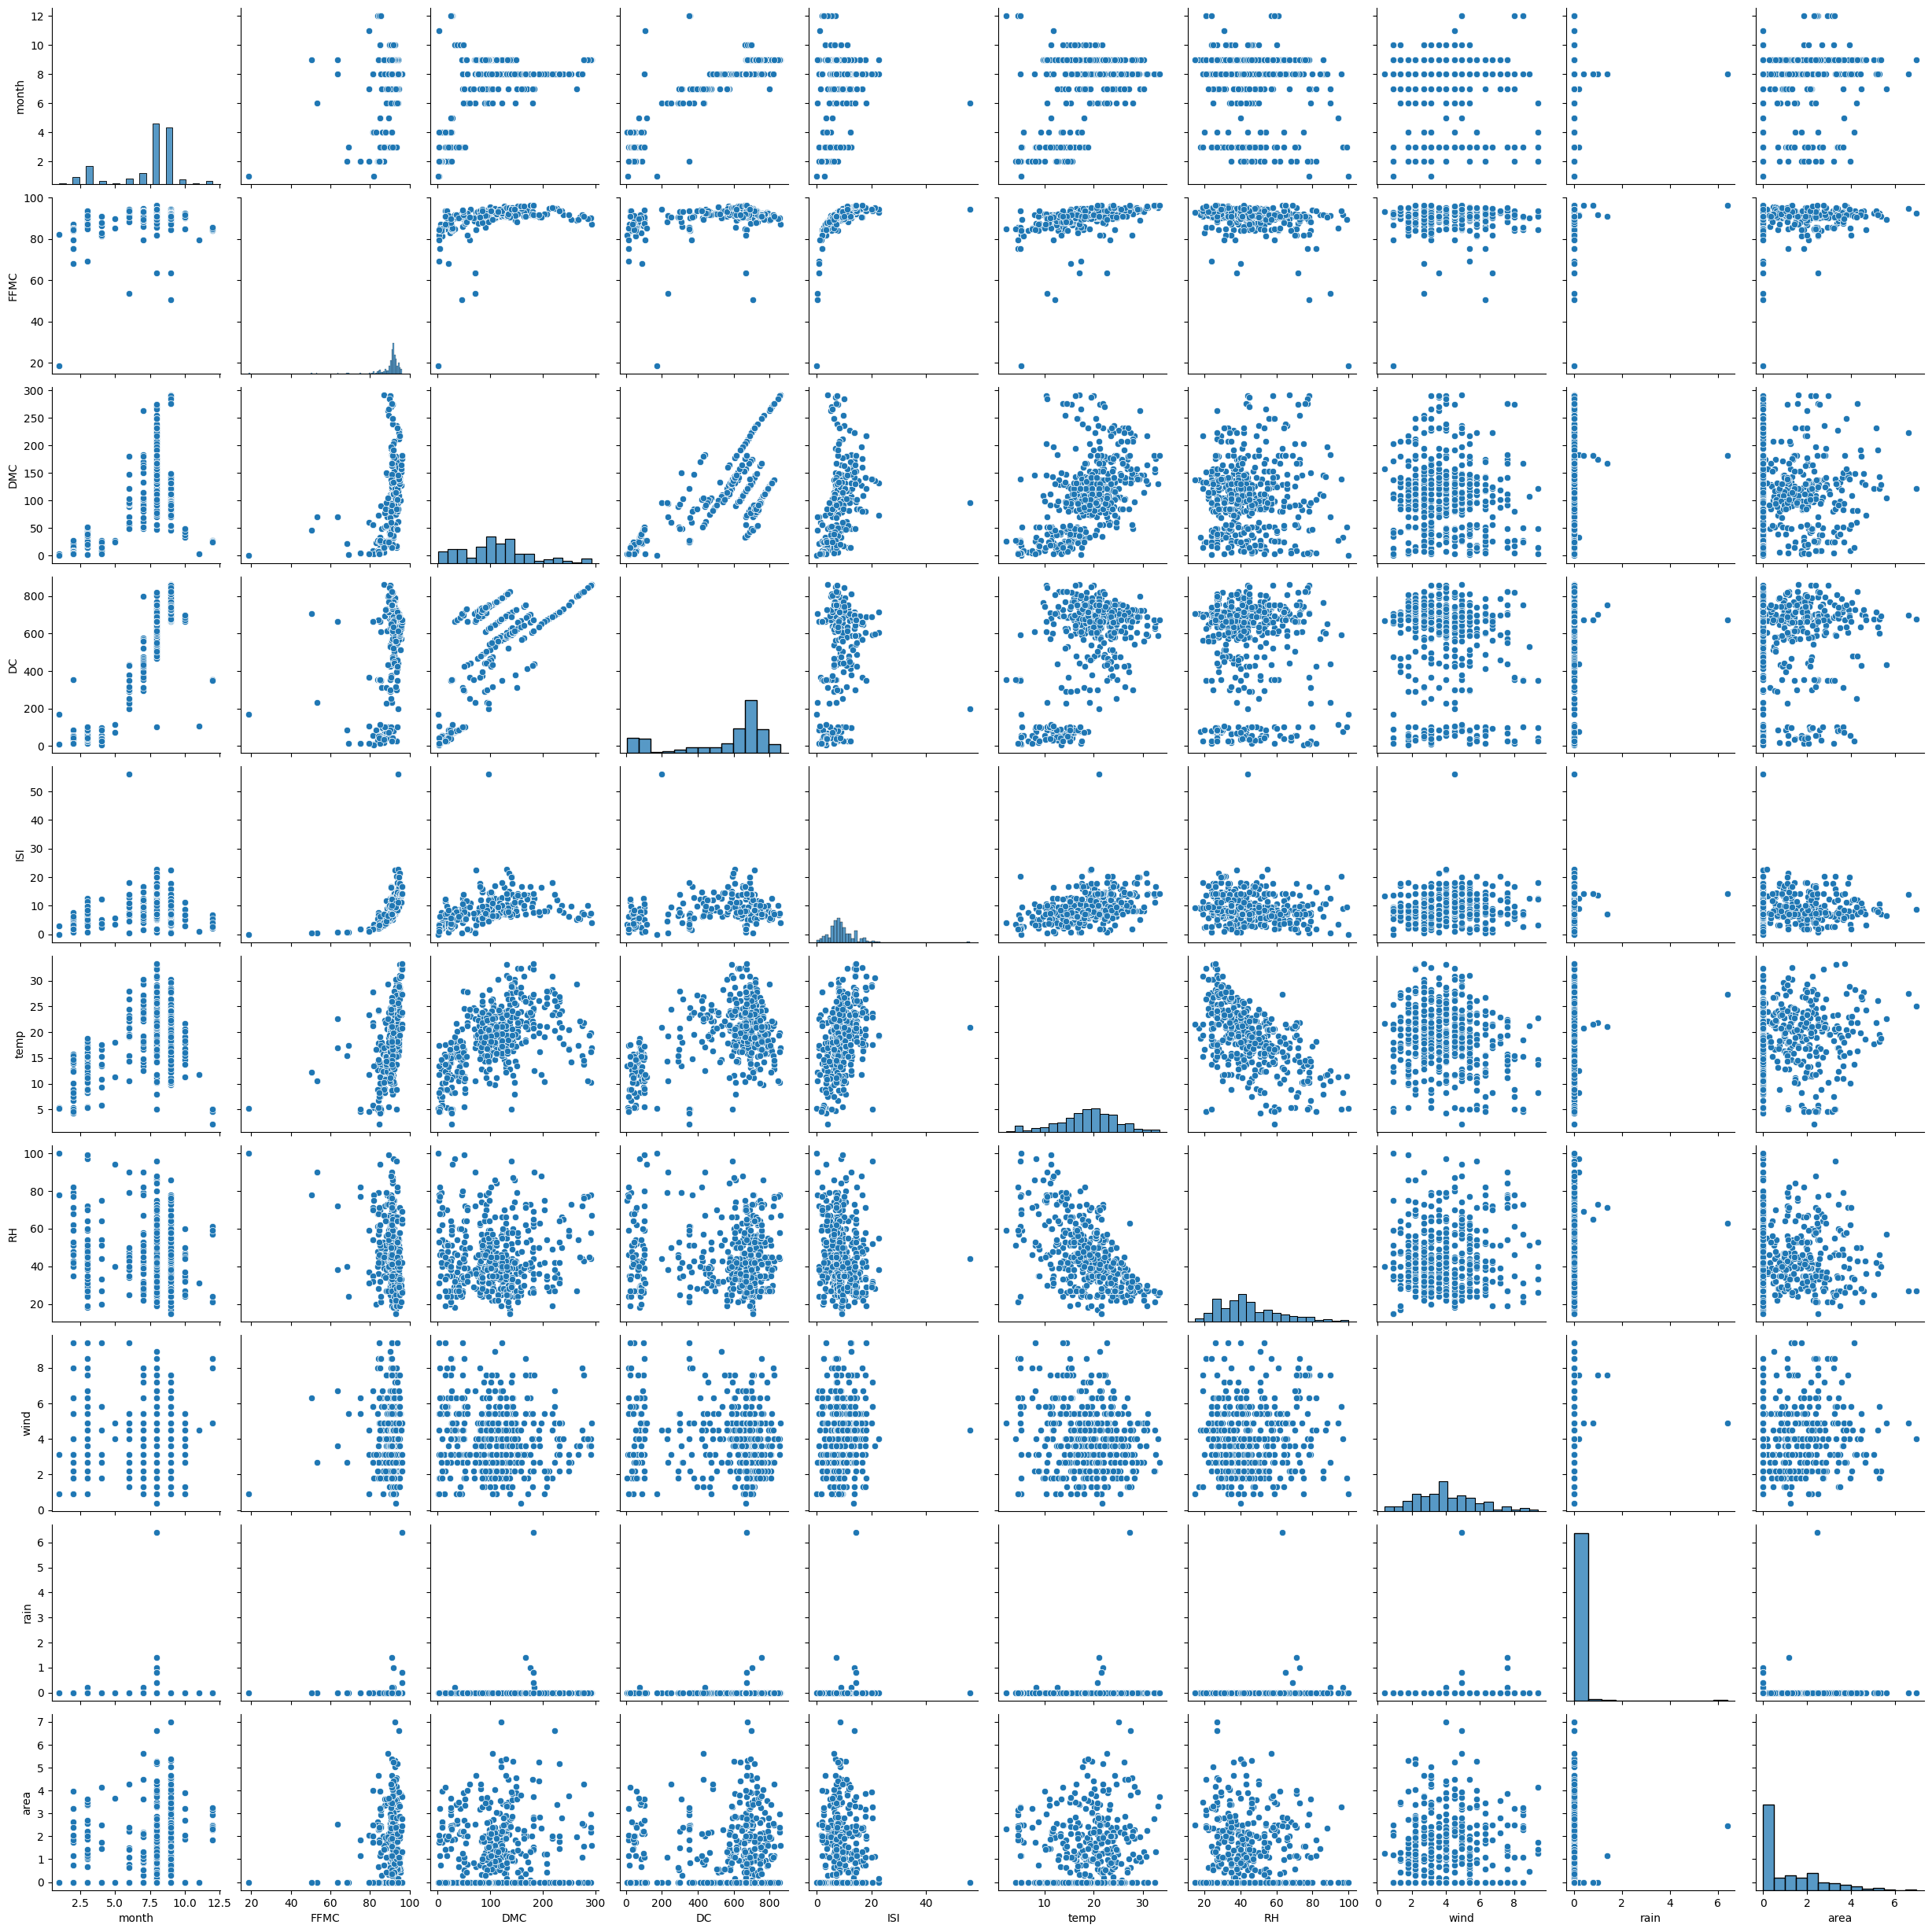

In [232]:
import seaborn as sns

sns.pairplot(data)

## Histogram

array([[<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'RH'}>, <Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'rain'}>],
       [<Axes: title={'center': 'area'}>, <Axes: >, <Axes: >]],
      dtype=object)

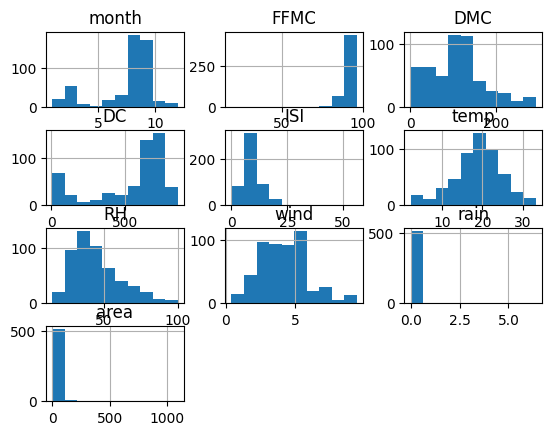

In [233]:
data_copy.hist()

Хистограм на target колоната area пред логаритамска трансформација:

<Axes: >

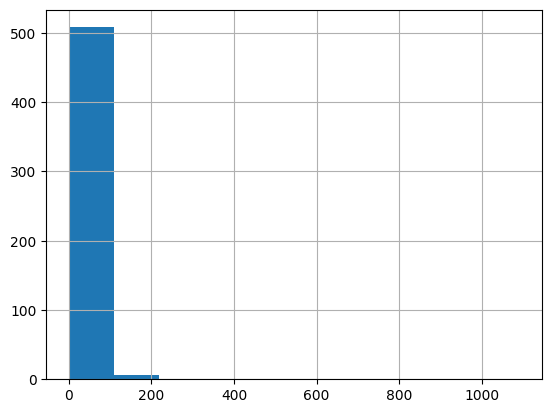

In [234]:
data_copy['area'].hist()

Хистограм на target колоната area ПОСЛЕ логаритамска трансформација:

<Axes: >

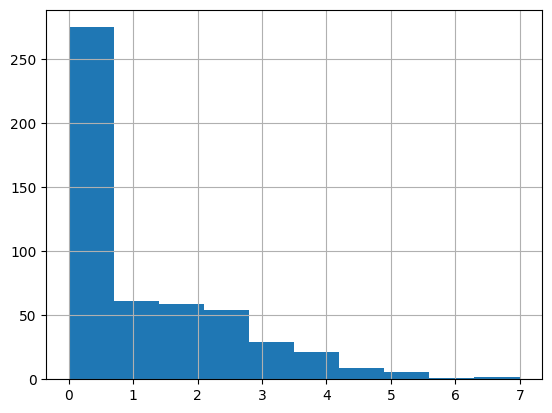

In [235]:
data['area'].hist()

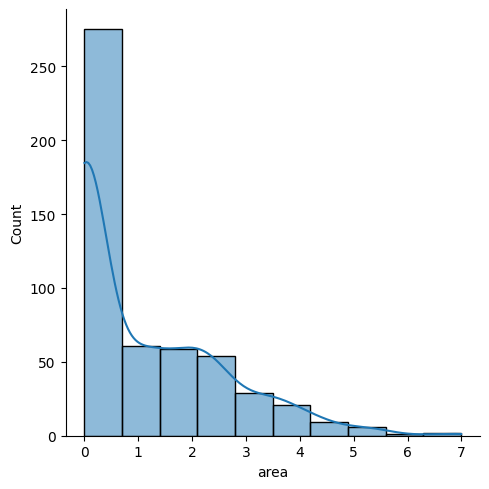

In [238]:
sns.displot(data['area'], bins=10, kde=True)

## Boxplot

<Axes: >

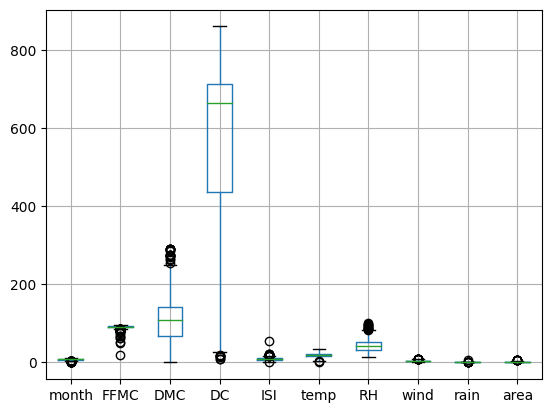

In [236]:
data.boxplot()

# Regression models

X - влезни податоци

Y - таргет колоната (area)

In [239]:
X = data[data.columns[:-1]]
Y = data['area']

Поделба на податоците на тренирачко и тестирачко множество. 80/20

In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## Linear Regression


In [241]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, Y_train)

Y_pred_linear = linear_model.predict(X_test_scaled)

r2_linear = r2_score(Y_test, Y_pred_linear)
print("R-squared score (Linear Regression):", r2_linear)

mse_linear = mean_squared_error(Y_test, Y_pred_linear)
print("Mean Squared Error (MSE) - Linear Regression:", mse_linear)


R-squared score (Linear Regression): -0.006686904604766619
Mean Squared Error (MSE) - Linear Regression: 2.0788629177327524


## Ridge Regression

In [242]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, Y_train)

Y_pred_ridge = ridge_model.predict(X_test)

r2_ridge = r2_score(Y_test, Y_pred_ridge)
print("R-squared score (Ridge):", r2_ridge)

mse_ridge = mean_squared_error(Y_test, Y_pred_ridge)
print("Mean Squared Error (MSE) - Ridge:", mse_ridge)

R-squared score (Ridge): -0.006694639009453773
Mean Squared Error (MSE) - Ridge: 2.0788788896968473


## Lasso Regression

In [243]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, Y_train)

Y_pred_lasso = lasso_model.predict(X_test)

r2_lasso = r2_score(Y_test, Y_pred_lasso)
print("R-squared score (Lasso):", r2_lasso)

mse_lasso = mean_squared_error(Y_test, Y_pred_lasso)
print("Mean Squared Error (MSE) - Lasso:", mse_lasso)


R-squared score (Lasso): -0.03594797932491223
Mean Squared Error (MSE) - Lasso: 2.139288619994768


## Bayesian Regression

In [244]:
from sklearn.linear_model import BayesianRidge

bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, Y_train)

Y_pred_bayesian = bayesian_model.predict(X_test)

r2_bayesian = r2_score(Y_test, Y_pred_bayesian)
print("R-squared score (Bayesian):", r2_bayesian)

mse_bayesian = mean_squared_error(Y_test, Y_pred_bayesian)
print("Mean Squared Error (MSE) - Bayesian:", mse_bayesian)


R-squared score (Bayesian): -0.031513632554295956
Mean Squared Error (MSE) - Bayesian: 2.130131454024261


## Support Vector Machine (SVR)

Тука го искористив истиот пристап кој бил искористен од [Cortez and Morais, 2007]:
  - SVM fed with only 4 direct weather conditions (temp, RH, wind and rain)

In [245]:
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = data[['temp', 'RH', 'wind', 'rain']]
Y = data['area']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# RBF kernel for non-linear regression.
# Moderate regularization strength (trade-off between low training error and low complexity).
# Small tolerance for errors (narrow margin of error around predicted values).
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled, Y_train)

Y_pred_svr = svr_model.predict(X_test_scaled)

mse_svr = mean_squared_error(Y_test, Y_pred_svr)
print("Mean Squared Error (MSE) - SVR:", mse_svr)

r2_svr = r2_score(Y_test, Y_pred_svr)
print("R-squared score (SVR):", r2_svr)


Mean Squared Error (MSE) - SVR: 2.4293309980619147
R-squared score (SVR): -0.1053157435180776


## Neural Network

In [246]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp_model = MLPRegressor(hidden_layer_sizes=(1, 5), activation='relu', solver='adam', random_state=42)
mlp_model.fit(X_train_scaled, Y_train)

Y_pred_mlp = mlp_model.predict(X_test_scaled)

r2_mlp = r2_score(Y_test, Y_pred_mlp)
print("R-squared score (Neural Network):", r2_mlp)

mse_mlp = mean_squared_error(Y_test, Y_pred_mlp)
print("Mean Squared Error (MSE) - Neural Network:", mse_mlp)


R-squared score (Neural Network): -0.019257052977690092
Mean Squared Error (MSE) - Neural Network: 2.2401859091509815


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Conclusion

Поради недоволно податоци (само 517), не најдов некој очигледен pattern во податоците.

Крајните модели воопшто не се добри и имаат лош r^2 score, т.е. висок MSE.

In [247]:
mse_values = [mse_mlp, mse_svr, mse_bayesian, mse_lasso, mse_ridge, mse_linear]

r2_scores = [r2_linear, r2_ridge, r2_lasso,
             r2_bayesian, r2_svr, r2_mlp]

# Create a dataframe
data = {'Model': ['Neural Network', 'SVR', 'Bayesian', 'Lasso', 'Ridge', 'Linear Regression'],
        'MSE': mse_values,
        'R^2': r2_scores}

df = pd.DataFrame(data)

df

,Model,MSE,R^2
0,Neural Network,2.240186,-0.006687
1,SVR,2.429331,-0.006695
2,Bayesian,2.130131,-0.035948
3,Lasso,2.139289,-0.031514
4,Ridge,2.078879,-0.105316
5,Linear Regression,2.078863,-0.019257
